In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
##### FIRST EVAL SHOULD BE SEPARATED BY CLASS ##### 
df_dev_list = []
for model in ['dummy_random','logreg_bigram','roberta_baseline','roberta_finetune']:
    for frame_type in ['Issue-General','Issue-Specific','Issue-Specific-Combined','Narrative']:
        for seed in [12,23,35,42,45]:
            filename = f'/shared/2/projects/framing/models/classify/11-05-20_eval/{frame_type}/{model}/seed_{seed}.tsv'
            if 'roberta' in model:
                filename = filename[:-4] + '_final_model_early_stopping.tsv'
            df = pd.read_csv(filename,sep='\t')
            df['Frame'] = df['Unnamed: 0']
            df['Frame Type'] = frame_type
            df['Seed'] = seed
            df['Model'] = model
            df = df.drop(columns=['Unnamed: 0','Support Pearson'])
            df = df[~df['Frame'].str.contains('avg')]
            df_dev_list.append(df)
            df['Eval'] = 'dev'
df_dev = pd.concat(df_dev_list)





In [4]:
df_test_list = []
for model in ['dummy_random','logreg_bigram','roberta_baseline','roberta_finetune']:
    for frame_type in ['Issue-General','Issue-Specific','Issue-Specific-Combined','Narrative']:
        for seed in [12,23,35,42,45]:
            filename = f'/shared/2/projects/framing/models/classify/11-14-20_test/{frame_type}/{model}/seed_{seed}.tsv'
            df = pd.read_csv(filename,sep='\t')
            df['Frame'] = df['Unnamed: 0']
            df['Frame Type'] = frame_type
            df['Seed'] = seed
            df['Model'] = model

            df = df.drop(columns=['Unnamed: 0','Support Pearson'])
            df = df[~df['Frame'].str.contains('avg')]
            df['Eval'] = 'test'
            df_test_list.append(df)
df_test = pd.concat(df_test_list)


In [81]:
df = pd.concat([df_dev,df_test])

In [6]:
df

,precision,recall,f1-score,support,LRAP,Frame,Frame Type,Seed,Model,Eval
0,0.035556,0.470588,0.066116,17.0,0.317885,Capacity and Resources,Issue-General,12,dummy_random,dev
1,0.200837,0.545455,0.293578,88.0,0.317885,Crime and Punishment,Issue-General,12,dummy_random,dev
2,0.187793,0.439560,0.263158,91.0,0.317885,Cultural Identity,Issue-General,12,dummy_random,dev
3,0.181818,0.459770,0.260586,87.0,0.317885,Economic,Issue-General,12,dummy_random,dev
4,0.087336,0.444444,0.145985,45.0,0.317885,External Regulation and Reputation,Issue-General,12,dummy_random,dev
...,...,...,...,...,...,...,...,...,...,...
1,0.871212,0.874525,0.872865,263.0,0.882222,Thematic,Narrative,35,roberta_finetune,test
0,0.660000,0.911602,0.765661,181.0,0.906667,Episodic,Narrative,42,roberta_finetune,test
1,0.893939,0.897338,0.895636,263.0,0.906667,Thematic,Narrative,42,roberta_finetune,test
0,0.654618,0.900552,0.758140,181.0,0.905556,Episodic,Narrative,45,roberta_finetune,test


In [20]:
###### Table 2  - Comparison to baselines ##### 
df_models = df.groupby(['Model','Eval']).agg('mean').reset_index().drop(columns=['precision','recall','support','LRAP','Seed']).sort_values('Eval')
df_models.pivot(index='Eval',columns='Model',values='f1-score').reset_index().round(3)

Model,Eval,dummy_random,logreg_bigram,roberta_baseline,roberta_finetune
0,dev,0.199,0.288,0.600,0.659
1,test,0.193,0.296,0.611,0.657


In [12]:
#### Table 3 - Performance across frame types ### 

df_frame_type = df[df['Model']=='roberta_finetune'].groupby(['Frame Type','Eval']).agg('mean').drop(columns=['support','Seed']).reset_index()
df_frame_type.sort_values('Eval').round(3)
df_frame_type[df_frame_type['Eval']=='test'].round(3)


,Frame Type,Eval,precision,recall,f1-score,LRAP
1,Issue-General,test,0.727,0.721,0.711,0.750
3,Issue-Specific,test,0.593,0.531,0.552,0.806
5,Issue-Specific-Combined,test,0.707,0.703,0.695,0.893
7,Narrative,test,0.757,0.887,0.808,0.894


In [30]:
df[df['Model']=='roberta_finetune'].groupby(['Frame','Eval']).agg('mean').drop(columns=['Seed']).reset_index().sort_values(['Eval','support']).round(3)


,Frame,Eval,precision,recall,f1-score,support,LRAP
58,Victim: War,dev,0.533,0.250,0.328,4.0,0.785
54,Victim: Global Economy,dev,0.933,0.600,0.720,5.0,0.785
44,Threat: Jobs,dev,1.000,0.525,0.683,8.0,0.785
20,Hero: Integration,dev,0.455,0.354,0.391,13.0,0.785
22,Hero: Worker,dev,0.501,0.369,0.421,13.0,0.785
18,Hero: Cultural Diversity,dev,0.699,0.387,0.490,15.0,0.785
46,Threat: National Cohesion,dev,0.565,0.512,0.526,16.0,0.785
0,Capacity and Resources,dev,0.530,0.706,0.601,17.0,0.745
42,Threat: Fiscal,dev,0.613,0.504,0.541,25.0,0.785
34,Quality of Life,dev,0.502,0.484,0.490,31.0,0.745


In [44]:
## Supplementary Material - performance by frame, Roberta Finetune, avg over 5 seeds, test set ### 


df[(df['Model']=='roberta_finetune') & (df['Eval']=='test')].groupby(['Frame Type','Frame']).agg('mean').round(3)

precision  \
Frame Type              Frame                                                  
Issue-General           Capacity and Resources                         0.451   
                        Crime and Punishment                           0.817   
                        Cultural Identity                              0.687   
                        Economic                                       0.824   
                        External Regulation and Reputation             0.708   
                        Fairness and Equality                          0.721   
                        Health and Safety                              0.784   
                        Legality, Constitutionality, Jurisdiction      0.817   
                        Morality and Ethics                            0.698   
                        Policy Prescription and Evaluation             0.660   
                        Political Factors and Implications             0.912   
                        Public Sentiment                               0.713   
                        Quality of Life                                0.657   
                        Security and Defense                           0.725   
Issue-Specific          Hero: Cultural Diversity                       0.591   
                        Hero: Integration                              0.503   
                        Hero: Worker                                   0.710   
                        Threat: Fiscal                                 0.694   
                        Threat: Jobs                                   0.743   
                        Threat: National Cohesion                      0.344   
                        Threat: Public Order                           0.737   
                        Victim: Discrimination                         0.785   
                        Victim: Global Economy                         0.571   
                        Victim: Humanitarian                           0.715   
                        Victim: War                                    0.133   
Issue-Specific-Combined Hero                                           0.629   
                        Threat                                         0.700   
                        Victim                                         0.791   
Narrative               Episodic                                       0.630   
                        Thematic                                       0.885   

                                                                   recall  \
Frame Type              Frame                                               
Issue-General           Capacity and Resources                      0.611   
                        Crime and Punishment                        0.695   
                        Cultural Identity                           0.852   
                        Economic                                    0.950   
                        External Regulation and Reputation          0.581   
                        Fairness and Equality                       0.635   
                        Health and Safety                           0.878   
                        Legality, Constitutionality, Jurisdiction   0.875   
                        Morality and Ethics                         0.570   
                        Policy Prescription and Evaluation          0.855   
                        Political Factors and Implications          0.911   
                        Public Sentiment                            0.338   
                        Quality of Life                             0.520   
                        Security and Defense                        0.816   
Issue-Specific          Hero: Cultural Diversity                    0.567   
                        Hero: Integration                           0.500   
                        Hero: Worker                                0.575   
                        Threat: Fiscal     

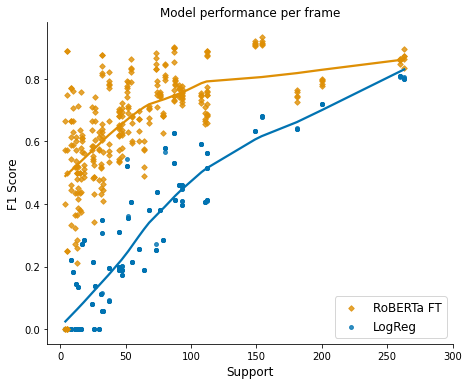

In [86]:
#sns.set_palette('colorblind')
g = sns.lmplot(x='support',y='f1-score',data=df[df['Model'].isin(['logreg_bigram','roberta_finetune'])],aspect=1.25,
           hue='Model',lowess=True,palette='colorblind',legend=False,markers=['o','D'],scatter_kws={"s": 15})
plt.title('Support vs Performance')
plt.title('Model performance per frame')
plt.ylabel('F1 Score',size=12)
plt.xlabel('Support',size=12)
plt.xlim((-10,300))
ax = g.axes[0,0]

handles, labels = ax.get_legend_handles_labels()
labels=['RoBERTa FT','LogReg']
ax.legend(reversed(handles), labels,fontsize=12)
plt.savefig(f'/shared/2/projects/framing/results/plots/f1_support_04-06-21.pdf',bbox_inches='tight')


In [ ]:
df_frame_type = df.groupby(['Frame Type','Eval']).agg('mean').drop(columns=['support','Seed']).reset_index()
df_frame_type.sort_values('Eval')

In [ ]:
df.groupby('Eval').agg('mean').reset_index().round(3)

In [ ]:
df.groupby('Eval').agg('mean').reset_index().drop(columns=['Seed','support'])

In [ ]:
df[df['Eval']=='dev'].groupby(['Frame','Eval']).agg('mean').reset_index().drop(columns=['Seed','precision','recall','LRAP'])

In [ ]:
df[df['Eval']=='test'].groupby(['Frame','Eval']).agg('mean').reset_index().drop(columns=['Seed','precision','recall','LRAP'])

In [ ]:
df_dev = pd.read_csv(dev_file,sep='\t').drop(columns=['Unnamed: 0'])
df_dev = df_dev.replace('Issue-Specific-Combined','Hero-Victim-Threat')
df_dev = df_dev[(df_dev['Model']=='roberta_finetune') & (df_dev['Checkpoint']=='final_model_early_stopping')]
df_dev = df_dev[(df_dev['Frame Type'] != 'all_frames')]
df_dev


In [ ]:
df_roberta[(df_roberta['Metric']=='f1-score') & (df_roberta['Model']=='roberta_finetune')].groupby('Checkpoint').agg('mean')

In [ ]:
df_dev= pd.read_csv(dev_file,sep='\t').drop(columns=['Unnamed: 0'])
df_dev = df_dev.replace('Issue-Specific-Combined','Hero-Victim-Threat')
df_dev['Eval'] = 'dev'

df_test = pd.read_csv(test_file,sep='\t').drop(columns=['Unnamed: 0'])
df_test = df_test.replace('Issue-Specific-Combined','Hero-Victim-Threat')
df_test['Eval'] = 'test'

df = pd.concat([df_dev,df_test])

In [ ]:
df = df[(df['Frame Type'] != 'all_frames')
                      &(df['Model'].isin(['dummy_random','logreg_bigram','roberta_baseline','roberta_finetune']))]


In [ ]:
df[df['Metric']=='f1-score'].groupby(['Model','Eval']).agg('mean')

In [ ]:
df_dev_subset[df_dev_subset['Metric']=='f1-score'].drop(columns=['Seed']).groupby('Model').agg('mean').reset_index().transpose()

In [ ]:
df_test_subset[df_test_subset['Metric']=='f1-score'].drop(columns=['Seed']).groupby('Model').agg('mean').reset_index().transpose()

In [ ]:
def compare_models_over_all_frame_types(df,metric):
    sns.barplot(x='Model',y='Score',data=df[df['Metric']==metric],palette='husl')
    plt.xticks(rotation=10)
    plt.ylabel(f'{metric}')
    #plt.title(f'{metric} averaged over all frame types')
    #plt.show()
    

In [ ]:
df_test_subset = df_test[(df_test['Frame Type'] != 'all_frames') 
                        &(df_test['Model'].isin(['dummy_random','logreg_unigram','logreg_bigram','roberta_baseline','roberta_finetune']))]

In [ ]:
compare_models_over_all_frame_types(df_test_subset,'f1-score')
plt.xticks(np.arange(5), ('Random', 'LogReg (1,2-gram)', 'LogReg (1-gram)', 
                          'RoBERTa (no finetuning)', 'RoBERTa (finetuned)'))
plt.ylabel('F1 score')
#plt.savefig(f'/shared/2/projects/framing/results/plots/avg_model_performance_test.pdf',bbox_inches='tight')


In [ ]:
def compare_models_within_frame_type(df,metric,models_to_plot):
    sns.set_palette('colorblind')
    sns.barplot(x='Frame Type',y='Score',hue='Model',data=df[(df['Metric']==metric) & (df['Model'].isin(models_to_plot))])
    plt.xticks(rotation=10)
    plt.legend(loc='center right', bbox_to_anchor=(1.4, .5))
    plt.ylabel(f'{metric}')

In [ ]:
compare_models_within_frame_type(df_test_subset,'f1-score',['dummy_random','logreg_unigram','roberta_baseline','roberta_finetune'])
L = plt.legend(loc='center right', bbox_to_anchor=(1.5, .5))
L.get_texts()[0].set_text('Random')
L.get_texts()[1].set_text('Logistic Regression')
L.get_texts()[2].set_text('RoBERTa (no finetuning)')
L.get_texts()[3].set_text('RoBERTa (finetuned)')
plt.ylabel('F1 Score')
plt.savefig(f'/shared/2/projects/framing/results/plots/model_test_f1_by_type.pdf',bbox_inches='tight')
plt.show()















In [ ]:
compare_models_within_frame_type(df_test_subset,'precision',['dummy_random','logreg_unigram','roberta_baseline','roberta_finetune'])
L = plt.legend(loc='center right', bbox_to_anchor=(1.5, .5))
L.get_texts()[0].set_text('Random')
L.get_texts()[1].set_text('Logistic Regression')
L.get_texts()[2].set_text('RoBERTa (no finetuning)')
L.get_texts()[3].set_text('RoBERTa (finetuned)')
plt.ylabel('Precision')
plt.savefig(f'/shared/2/projects/framing/results/plots/model_test_precision_by_type.pdf',bbox_inches='tight')

plt.show()








In [ ]:
compare_models_within_frame_type(df_test_subset,'recall',['dummy_random','logreg_unigram','roberta_baseline','roberta_finetune'])
L = plt.legend(loc='center right', bbox_to_anchor=(1.5, .5))
L.get_texts()[0].set_text('Random')
L.get_texts()[1].set_text('Logistic Regression')
L.get_texts()[2].set_text('RoBERTa (no finetuning)')
L.get_texts()[3].set_text('RoBERTa (finetuned)')
plt.ylabel('Recall')
plt.savefig(f'/shared/2/projects/framing/results/plots/model_test_recall_by_type.pdf',bbox_inches='tight')
plt.show()

In [ ]:
import os
base_path = '/shared/2/projects/framing/models/classify/11-14-20_test/'
mcnemar = os.path.join(base_path,'mcnemar.tsv')

In [ ]:
mc = pd.read_csv(mcnemar,sep='\t').drop(columns=['Unnamed: 0']).sort_values('P-value',ascending=False)

In [ ]:
mc[mc['Model 2']=='roberta_finetune' & mc['P-value']]

In [ ]:
all_dfs = []
for frame_type in ['Issue-General','Issue-Specific','Issue-Specific-Combined','Narrative']:
    for model in ['roberta_finetune','logreg_unigram']:
        if frame_type != 'all_frames' or model != 'logreg_unigram':
            for seed in [12,23,35,42,45]:
                filename = f'/shared/2/projects/framing/models/classify/11-14-20_test/{frame_type}/{model}/seed_{seed}.tsv' 
                df = pd.read_csv(filename,sep='\t')
                df['Seed'] = seed
                df['Model'] = model
                if model == 'logreg_unigram':
                    df['Model'] = 'Logistic Regression'
                if model == 'roberta_finetune':
                    df['Model'] = 'RoBERTa (finetuned)'
                df['frame_type'] = frame_type
                if frame_type == 'Issue-Specific-Combined':
                    df['frame_type'] = 'Hero-Victim-Threat'
                all_dfs.append(df)


In [ ]:
support_df = pd.concat(all_dfs,axis=0)[['support','Seed','Model','Unnamed: 0','f1-score','frame_type']]
support_df['Frame'] = support_df['Unnamed: 0']
support_df = support_df.drop(columns=['Unnamed: 0'])
support_df = support_df[~support_df.Frame.str.contains("avg")]
#support_df = support_df[support_df['Frame'] != 'Episodic']
#support_df = support_df[support_df['Frame'] != 'Thematic']
support_df

In [ ]:
sns.set_palette('colorblind')
sns.lmplot(x='support',y='f1-score',data=support_df,hue='Model',lowess=True)
plt.title('Support vs Performance')
plt.title('Model performance per frame')
plt.ylabel('F1 Score')
plt.xlabel('Support')
plt.savefig(f'/shared/2/projects/framing/results/plots/model_test_f1_vs_support.pdf',bbox_inches='tight')
plt.show()


In [ ]:
df_old1 = df_old.replace('roberta','roberta_old')
df_full = pd.concat([df_old1,df_new])
df_roberta = df_full[df_full.Model.str.contains("roberta")]
df_roberta

In [ ]:
roberta_eval_file = '/shared/2/projects/framing/models/classify/11-05-20_eval/roberta_eval_metrics.tsv'

In [ ]:
df_roberta = pd.read_csv(roberta_eval_file,sep='\t')
df_roberta = df_roberta.replace('Issue-Specific-Combined','Hero-Victim-Threat')


In [ ]:
df_roberta_subset = df_roberta[(df_roberta['Metric']=='f1-score') & (df_roberta['Model']=='roberta_finetune')]

In [ ]:
df_roberta_subset.drop(columns=['Unnamed: 0','Seed']).groupby(['Frame Type','Checkpoint']).agg('mean').reset_index()

In [ ]:
sns.barplot(x='Frame Type',y='Score',data=df_roberta_subset,hue='Checkpoint')
plt.xticks(rotation=10)
plt.legend(loc='center right', bbox_to_anchor=(1.55, .5))
plt.ylabel(f'{metric}')

In [ ]:
df_roberta_final = df_roberta[(df_roberta['Checkpoint']=='final_model_early_stopping')
                              & (df_roberta['Metric']=='f1-score')]

In [ ]:
sns.barplot(x='Frame Type',y='Score',data=df_roberta_final,hue='Model')
plt.xticks(rotation=10)
plt.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.ylabel(f'{metric}')

In [ ]:
df_roberta_subset.drop(columns=['Unnamed: 0','Seed']).groupby(['Frame Type','Checkpoint']).agg('mean').reset_index()

In [ ]:
df_roberta_subset.drop(columns=['Unnamed: 0','Seed']).groupby(['Checkpoint']).agg('mean').reset_index()

In [ ]:
df_roberta_final.drop(columns=['Unnamed: 0','Seed']).groupby(['Frame Type','Model']).agg('mean').reset_index()

In [ ]:
df_roberta_final.drop(columns=['Unnamed: 0','Seed']).groupby(['Model']).agg('mean').reset_index()

In [ ]:
df_final = df_roberta[(df_roberta['Model']=='roberta_finetune') & 
           (df_roberta['Metric'].isin(['precision','recall','f1-score'])) & 
           (df_roberta['Checkpoint']=='final_model_early_stopping')]
df_final = df_final.drop(columns=['Unnamed: 0','Checkpoint','Model'])

In [ ]:
sns.barplot(x='Frame Type',y='Score',hue='Metric',data=df_final)
plt.xticks(rotation=10)
plt.legend(loc='center right', bbox_to_anchor=(1.3, .5))
plt.ylabel(f'{metric}')

In [ ]:
sns.barplot(x='Metric',y='Score',data=df_final)
plt.xticks(rotation=10)
plt.legend(loc='center right', bbox_to_anchor=(1.3, .5))
plt.ylabel(f'{metric}')

In [ ]:
df_old.replace('roberta','roberta_old')


In [ ]:
df_old = df_old.replace('roberta','roberta_old')

In [ ]:
#df_roberta_old = 
df_rob_old = df_old[df_old['Model']=='roberta_old']

In [ ]:
df_rob_new = df_roberta[df_roberta['Checkpoint']=='final_model_early_stopping'].drop(columns=['Unnamed: 0','Checkpoint'])

In [ ]:
df_compare = pd.concat([df_rob_old,df_rob_new])

In [ ]:
df_compare

In [ ]:
sns.barplot(x='Frame Type',y='Score',data=df_compare[df_compare['Metric']=='f1-score'],hue='Model')
plt.xticks(rotation=10)
plt.legend(loc='center right', bbox_to_anchor=(1.4, .5))
plt.ylabel(f'{metric}')

In [ ]:
df_compare[df_compare['Metric']=='f1-score'].groupby(['Frame Type','Model']).agg('mean').reset_index().drop(columns=['Seed'])

In [ ]:
import glob 
all_dfs = []
for seed in [12,23,35,42,45]:
    filename = f'/shared/2/projects/framing/models/classify/11-05-20_eval/all_frames/roberta_finetune/seed_{seed}_final_model_early_stopping.tsv'
    df = pd.read_csv(filename,sep='\t')
    all_dfs.append(df)
df_all_frames = pd.concat(all_dfs)

In [ ]:
df_all_frames = pd.concat(all_dfs)
df_all_frames = df_all_frames.drop(columns=['LRAP','Support Pearson'])
df_all_frames.columns = ['frame','precision','recall','f1-score','support']
df_all_frames = df_all_frames[~df_all_frames.frame.str.contains("avg")]


In [ ]:
#df_all_frames.sort_values('f1-score')

df_all_frames.groupby('frame').agg('mean').reset_index().sort_values('f1-score',ascending=True).round(0)

In [ ]:
df_roberta[(df_roberta['Checkpoint']=='final_model_early_stopping') & 
          (df_roberta['Metric']=='f1-score') & 
          (df_roberta['Model']=='roberta_finetune') & 
           (df_roberta['Frame Type'] == 'Issue-Specific')]

In [ ]:
df_roberta[(df_roberta['Checkpoint']=='final_model_early_stopping') & 
          (df_roberta['Metric']=='f1-score') & 
           (df_roberta['Seed'] == 12) &
          (df_roberta['Model']=='roberta_finetune')].drop(columns=['Unnamed: 0','Model','Checkpoint','Metric']).drop(columns=['Seed'])

In [ ]:
df_single_cat_list = []
for frame_type in ['Issue-General','Issue-Specific','Issue-Specific-Combined','Narrative']:
    df_single_cat_list.append(pd.read_csv(f'/shared/2/projects/framing/models/classify/11-05-20_eval/{frame_type}/roberta_finetune/seed_12_final_model_early_stopping.tsv',sep='\t'))
                              


In [ ]:
df_single_cat = pd.concat(df_single_cat_list)
df_single_cat = df_single_cat.rename(columns={"Unnamed: 0": "Frame",'f1-score':'f1-single-type'})
df_single_cat = df_single_cat[~df_single_cat.Frame.str.contains("avg")]
df_single_cat = df_single_cat.drop(columns=['precision','recall','LRAP','Support Pearson'])
df_single_cat

In [ ]:
df_all_cat=pd.read_csv(f'/shared/2/projects/framing/models/classify/11-05-20_eval/all_frames/roberta_finetune/seed_12_final_model_early_stopping.tsv',sep='\t')
df_all_cat = df_all_cat.rename(columns={"Unnamed: 0": "Frame",'f1-score':'f1-score-full-model'})
df_all_cat = df_all_cat[~df_all_cat.Frame.str.contains("avg")]
df_all_cat = df_all_cat.drop(columns=['precision','recall','support','LRAP','Support Pearson'])

df_all_cat

In [ ]:
df_single_vs_full = df_single_cat.merge(df_all_cat,on='Frame')

In [ ]:
df_single_vs_full['single-type-improvement'] = df_single_vs_full['f1-single-type'] - df_single_vs_full['f1-score-full-model']

In [ ]:
df_single_vs_full['single-type-improvement'].mean()

In [ ]:
df_single_vs_full.round(3)

In [ ]:
df = pd.melt(df_single_vs_full[['Frame','support','single-type-improvement']],id_vars=['Frame','support'])

In [ ]:
df = pd.melt(df_single_vs_full[['Frame','support','single-type-improvement']],id_vars=['Frame','support'])
sns.lmplot(x='support',y='value',data=df)
plt.title('Separate model per frame type vs single model  ')
plt.ylabel('Separate frame type f1 - Single model f1')

In [ ]:
df_compare_types = []
for df in df_single_cat_list:
    df = df.rename(columns={"Unnamed: 0": "Frame",'f1-score':'f1-single-type'})
    df = df[~df.Frame.str.contains("avg")]
    df = df.drop(columns=['precision','recall','LRAP','Support Pearson'])
    df2 = df.merge(df_all_cat,on='Frame')
    df2['single-type-improvement'] = df2['f1-single-type'] - df2['f1-score-full-model']
    df_compare_types.append(df2)
    

In [ ]:
df_compare_types[0]

In [ ]:
df_compare_types[1]

In [ ]:
df_compare_types[2]

In [ ]:
df_compare_types[3]

In [ ]:
df_single_vs_full[df_single_vs_full['single-type-improvement'] < 0]

In [ ]:
df1 = df_test_subset.groupby(['Model','Metric']).agg('mean').reset_index().drop(columns=['Seed'])
df1 = df1[df1['Metric'].isin(['f1-score','precision','recall','LRAP'])]

In [ ]:
df1.pivot(index='Model',columns='Metric',values='Score').reset_index().round(3)


In [ ]:
df2 = df_test_subset.groupby(['Frame Type','Model','Metric']).agg('mean').reset_index().drop(columns=['Seed'])
df2 = df2[df2['Metric'].isin(['f1-score','precision','recall','LRAP'])]
df2 = df2[df2['Model']=='roberta_finetune']

In [ ]:
df2.pivot(index='Frame Type',columns='Metric',values='Score').reset_index().round(3)


In [ ]:
df = df_test_subset.copy()
df[(df['Metric']=='f1-score') & (df['Model']=='roberta_finetune') & (df['Frame Type']=='Issue-Specific')]

In [ ]:
df_test_support = df_test['Frame Type'] 

In [ ]:
df_test

In [ ]:
support_df[(support_df['Model']=='RoBERTa (finetuned)') & (support_df['Seed']==12)][['frame_type','Frame','support','f1-score']].sort_values(['frame_type','support']).round(3)

In [ ]:
support_df

In [46]:
df

,precision,recall,f1-score,support,LRAP,Frame,Frame Type,Seed,Model,Eval
0,0.035556,0.470588,0.066116,17.0,0.317885,Capacity and Resources,Issue-General,12,dummy_random,dev
1,0.200837,0.545455,0.293578,88.0,0.317885,Crime and Punishment,Issue-General,12,dummy_random,dev
2,0.187793,0.439560,0.263158,91.0,0.317885,Cultural Identity,Issue-General,12,dummy_random,dev
3,0.181818,0.459770,0.260586,87.0,0.317885,Economic,Issue-General,12,dummy_random,dev
4,0.087336,0.444444,0.145985,45.0,0.317885,External Regulation and Reputation,Issue-General,12,dummy_random,dev
...,...,...,...,...,...,...,...,...,...,...
1,0.871212,0.874525,0.872865,263.0,0.882222,Thematic,Narrative,35,roberta_finetune,test
0,0.660000,0.911602,0.765661,181.0,0.906667,Episodic,Narrative,42,roberta_finetune,test
1,0.893939,0.897338,0.895636,263.0,0.906667,Thematic,Narrative,42,roberta_finetune,test
0,0.654618,0.900552,0.758140,181.0,0.905556,Episodic,Narrative,45,roberta_finetune,test


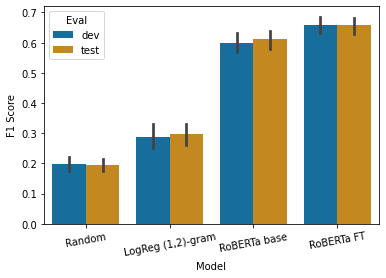

In [58]:
sns.barplot(x='Model',y='f1-score',data=df,hue='Eval')
plt.xticks(rotation=10)
plt.ylabel('F1 Score')
plt.xticks(range(4),['Random','LogReg (1,2)-gram','RoBERTa base','RoBERTa FT'])
plt.savefig(f'/shared/2/projects/framing/results/plots/all_models_dev_test_f1.pdf',bbox_inches='tight')

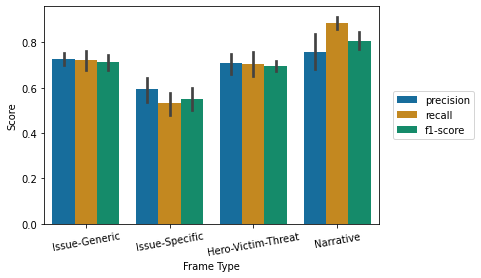

In [75]:
df1 = df[(df['Eval']=='test') & (df['Model']=='roberta_finetune')].drop(columns=['LRAP','support','Frame','Seed','Model','Eval'])
df1 = pd.melt(df1,id_vars=['Frame Type'],var_name='Metric',value_name='Score')

sns.barplot(x='Frame Type',y='Score',hue='Metric',data=df1)
plt.xticks(rotation=10)
plt.ylabel('Score')
plt.xticks(range(4),['Issue-Generic','Issue-Specific','Hero-Victim-Threat','Narrative'])
plt.legend(loc='center right', bbox_to_anchor=(1.3, .5))



plt.savefig(f'/shared/2/projects/framing/results/plots/test_f1_by_frame_type.pdf',bbox_inches='tight')





In [2]:
filename = '/shared/2/projects/framing/models/classify/3-30-21_eval_liberal/eval_metrics.tsv'
df = pd.read_csv(filename,sep='\t')

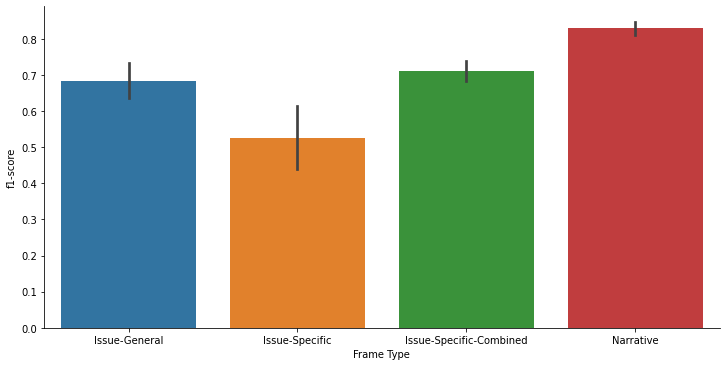

In [8]:
df = df[(df['Model']=='roberta_finetune')]
sns.catplot(x='Frame Type',y='f1-score',data=df,aspect=2,kind='bar')

In [51]:
all_dfs_ideology = []
#for keyword in ['US','GB','EU']:
for keyword in ['Liberal','Conservative']:
    filename = f'/shared/2/projects/framing/models/classify/3-30-21_eval_{keyword.lower()}/eval_metrics.tsv'
    df = pd.read_csv(filename,sep='\t')
    df = df[(df['Model']=='roberta_finetune')]
    df['Ideology'] = keyword
    all_dfs_ideology.append(df)

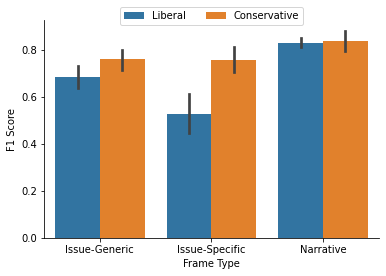

In [87]:
df_ideology = pd.concat(all_dfs_ideology)
sns.barplot(x='Frame Type',y='f1-score',data=df_ideology[df_ideology['Frame Type']!='Issue-Specific-Combined'],hue='Ideology')
sns.despine()

#plt.xticks(rotation=5)
plt.ylabel('F1 Score')
plt.xticks(range(3),['Issue-Generic','Issue-Specific','Narrative'])
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.02),ncol=2)
plt.savefig(f'/shared/2/projects/framing/results/plots/f1_ideology_04-09-21.pdf',bbox_inches='tight')


In [63]:
all_dfs_country = []
for keyword in ['US','GB','EU']:
    filename = f'/shared/2/projects/framing/models/classify/3-30-21_eval_{keyword}/eval_metrics.tsv'
    df = pd.read_csv(filename,sep='\t')
    df = df[(df['Model']=='roberta_finetune')]
    df['Country'] = keyword
    all_dfs_country.append(df)

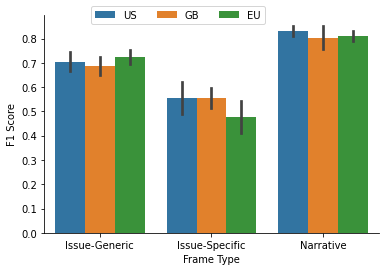

In [88]:
df_country = pd.concat(all_dfs_country)
sns.barplot(x='Frame Type',y='f1-score',data=df_country[df_country['Frame Type']!='Issue-Specific-Combined'],hue='Country')
sns.despine()

#plt.xticks(rotation=5)
plt.ylabel('F1 Score')
plt.xticks(range(3),['Issue-Generic','Issue-Specific','Narrative'])
plt.legend(loc='center', bbox_to_anchor=(0.4, 1),ncol=3)
plt.savefig(f'/shared/2/projects/framing/results/plots/f1_country_04-09-21.pdf',bbox_inches='tight')


In [59]:
df_country.groupby(['Frame Type','Country']).agg('mean').reset_index()[['Frame Type','Country','f1-score']].pivot(index='Frame Type',columns='Country').reset_index()

Frame Type  f1-score                    
Country                                 EU        GB        US
0                  Issue-General  0.724689  0.687097  0.704290
1                 Issue-Specific  0.475272  0.557080  0.554034
2        Issue-Specific-Combined  0.659843  0.678516  0.716421
3                      Narrative  0.810090  0.802564  0.831046

In [60]:
df_ideology.groupby(['Frame Type','Ideology']).agg('mean').reset_index()[['Frame Type','Ideology','f1-score']].pivot(index='Frame Type',columns='Ideology').reset_index()

Frame Type     f1-score          
Ideology                          Conservative   Liberal
0                   Issue-General     0.757644  0.684478
1                  Issue-Specific     0.756499  0.524890
2         Issue-Specific-Combined     0.844767  0.710509
3                       Narrative     0.835805  0.829612

In [61]:
df = pd.read_csv('/shared/2/projects/framing/data/labeled_data/dataset_11-03-20/train.tsv',sep='\t')


In [69]:
len(df[(df['country']=='US') & (df['libcon_raw']=='liberal')])

385

In [68]:
len(df[(df['country']=='US') & (df['libcon_raw']=='conservative')])

334

In [19]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]